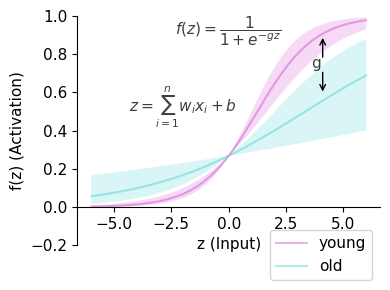

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

# Define the sigmoid function with a slope parameter
def sigmoid(x, g, b=-1):
    return 1 / (1 + np.exp(-(g*x+b)))

# Generate some data
x = np.linspace(-6, 6, 100)

# Set the slope parameter
g_old = [0.1, 0.3,0.5]
g_young = [0.6, 0.8, 1]

# Compute the sigmoid function with the slope parameter
young_min = sigmoid(x, g_young[0])
young_mean = sigmoid(x, g_young[1])
young_max = sigmoid(x, g_young[2])
old_min = sigmoid(x, g_old[0])
old_mean = sigmoid(x, g_old[1])
old_max = sigmoid(x, g_old[2])

# Plot the sigmoid function with the slope parameter
sigmoid(0, g_young[0])

fig, ax = plt.subplots(tight_layout=True,figsize=(4,3))
ax.plot(x, young_mean, color = 'm', alpha=.3, label='young')
ax.fill_between(x, young_min, young_max, facecolor='m', alpha = .15, interpolate=True)
ax.plot(x, old_mean, color = 'c', alpha=.3, label='old')
ax.fill_between(x, old_min, old_max, facecolor='c', alpha = .15, interpolate=True)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('f(z) (Activation)',fontsize=11)
ax.set_xlabel('z (Input)',fontsize=11)
ax.set_ylim([-.2,1])
ax.tick_params(axis='both', which='major', labelsize=11)
ax.text(x=0,y=0.9,s=r'$f(z) =  \dfrac{1}{1 + e^{-gz}}$', alpha=.75, horizontalalignment='center', fontsize=11)
ax.text(x=-2,y=0.5,s=r'$z=\sum_{i=1}^{n}{w_ix_i+b}$', alpha=.75, horizontalalignment='center',fontsize=11)
ax.text(x=3.8,y=0.75,s='g', alpha=.75, horizontalalignment='center',verticalalignment='center',fontsize=11)
ax.annotate("", xy=(4.1, 0.9), xytext=(4.1, 0.77),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(4.1, 0.59), xytext=(4.1, 0.72),
            arrowprops=dict(arrowstyle="->"))
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.1),fontsize=11)
fig.savefig('../figures/dedifferentiation1.svg')

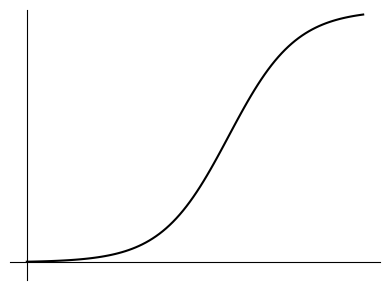

In [7]:
x = np.linspace(-10, 10, 100)
fig, ax = plt.subplots(tight_layout=True,figsize=(4,3))
ax.plot(x, sigmoid(x,0.5), color = 'k')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', -10))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylim([-.07,1])
ax.set_xlim([-11,11])
ax.set_yticks([])
ax.set_xticks([])
fig.savefig('../figures/dedifferentiation2.svg')

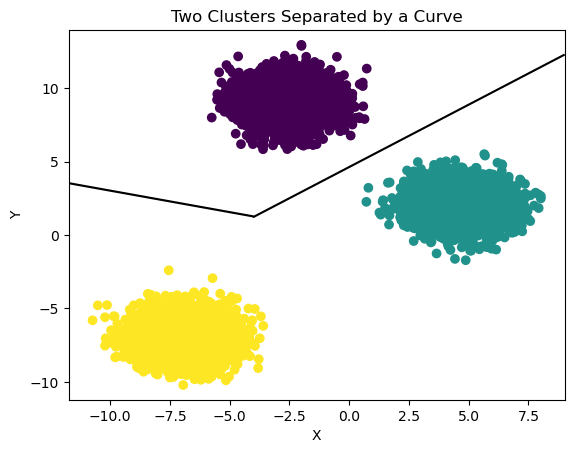

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data with two clusters
X, y = make_blobs(n_samples=10000, centers=3, random_state=42)

# Fit a support vector machine to separate the two clusters
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

# Define a meshgrid of points to plot the decision boundary
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01),
                     np.arange(ymin, ymax, 0.01))

# Plot the data points and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0], colors='black')

# Add a title and axis labels
ax.set_title('Two Clusters Separated by a Curve')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()


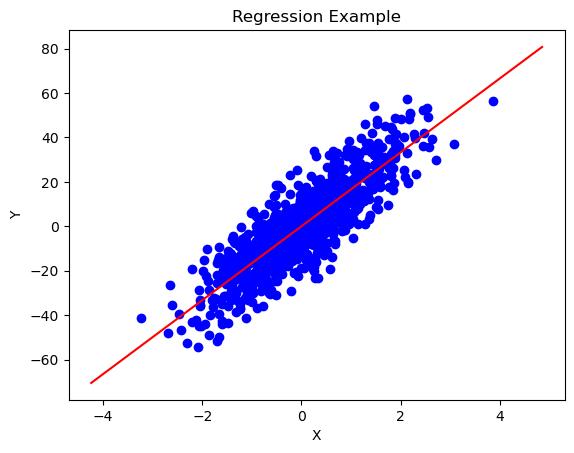

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic data with a linear relationship
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Create a grid of points to plot the regression line
xmin, xmax = X.min() - 1, X.max() + 1
xx = np.linspace(xmin, xmax, 100)
yy = model.predict(xx.reshape(-1, 1))

# Plot the data points and regression line
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue')
ax.plot(xx, yy, color='red')

# Add a title and axis labels
ax.set_title('Regression Example')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()


/home/chris/miniconda3/envs/diss/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


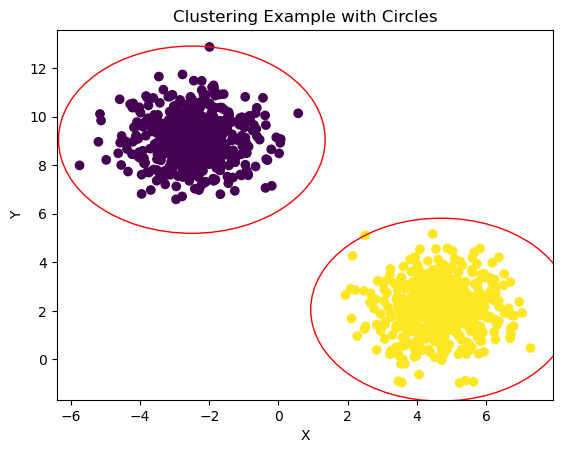

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with two clusters
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

# Fit a K-means clustering model to the data
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

# Get the predicted labels, cluster centers, and radii
labels = model.labels_
centers = model.cluster_centers_
radii = np.linalg.norm(X - centers[labels], axis=1)

# Plot the data points and cluster centers with circles
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
for i, (x, y) in enumerate(centers):
    circle = plt.Circle((x, y), radii[labels==i].max(), color='red', fill=False)
    ax.add_artist(circle)

# Add a title and axis labels
ax.set_title('Clustering Example with Circles')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the plot
plt.show()


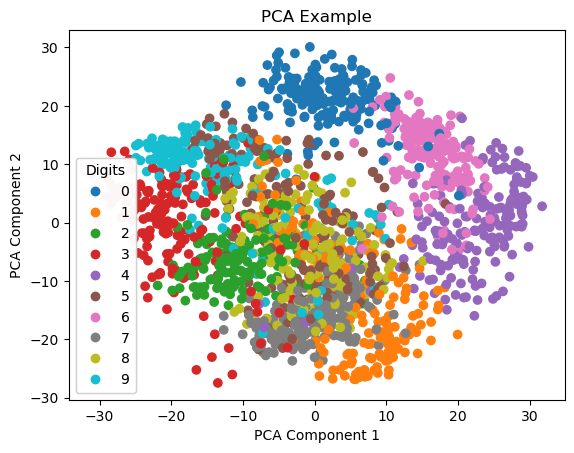

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load the digits dataset and reduce its dimensionality to 2 using PCA
digits = load_digits()
X_reduced = PCA(n_components=2).fit_transform(digits.data)

# Plot the reduced data
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), title='Digits')
ax.add_artist(legend)

# Add a title and axis labels
ax.set_title('PCA Example')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')

# Show the plot
plt.show()
